### Step 0: Merge all csv files

In [1]:
import pandas as pd
import os

# Define the folder path
folder_path = "/Users/ramihuunguyen/Documents/PhD/Visualization_Literacy/AVANITH/Find_Correlations/Predictions"

# List of filenames (match your files exactly)
filenames = [
    "Final_chartgemma__find_correlations.csv",
    "Final_chatgpt_find_correlations.csv",
    "Final_gemini_2_5_pro_find_correlations.csv",
    "Final_gemini_flash_find_correlations.csv"
]

# Read and concatenate all CSVs
dfs = [pd.read_csv(os.path.join(folder_path, file)) for file in filenames]
merged_df = pd.concat(dfs, ignore_index=True)

# Save merged DataFrame
output_csv = os.path.join(folder_path, "Merged_find_correlations.csv")
merged_df.to_csv(output_csv, index=False)

print(f"✅ Merged CSV saved to: {output_csv}")


✅ Merged CSV saved to: /Users/ramihuunguyen/Documents/PhD/Visualization_Literacy/AVANITH/Find_Correlations/Predictions/Merged_find_correlations.csv


## Step 1: Load dataset



In [2]:
import pandas as pd

# Load merged Find Correlations file
find_correlations_df = pd.read_csv("/Users/ramihuunguyen/Documents/PhD/Visualization_Literacy/AVANITH/Find_Correlations/Predictions/Merged_find_correlations.csv")

# Show number of rows
len(find_correlations_df)


200

## 2: Check number of each individual of dataset

In [3]:
import pandas as pd

# Load each model's prediction file
chart_gemma_df = pd.read_csv("/Users/ramihuunguyen/Documents/PhD/Visualization_Literacy/AVANITH/Find_Correlations/Predictions/Final_chartgemma__find_correlations.csv")
chart_gpt_4o_df = pd.read_csv("/Users/ramihuunguyen/Documents/PhD/Visualization_Literacy/AVANITH/Find_Correlations/Predictions/Final_chatgpt_find_correlations.csv")
gemini_2_5_flash_df = pd.read_csv("/Users/ramihuunguyen/Documents/PhD/Visualization_Literacy/AVANITH/Find_Correlations/Predictions/Final_gemini_flash_find_correlations.csv")
gemini_2_5_pro_df = pd.read_csv("/Users/ramihuunguyen/Documents/PhD/Visualization_Literacy/AVANITH/Find_Correlations/Predictions/Final_gemini_2_5_pro_find_correlations.csv")

# Print row counts
print("✅ Total rows in chartgemma:", len(chart_gemma_df))
print("✅ Total rows in chatgpt:", len(chart_gpt_4o_df))
print("✅ Total rows in gemini_flash:", len(gemini_2_5_flash_df))
print("✅ Total rows in gemini_pro:", len(gemini_2_5_pro_df))


✅ Total rows in chartgemma: 50
✅ Total rows in chatgpt: 50
✅ Total rows in gemini_flash: 50
✅ Total rows in gemini_pro: 50


## 3: Check unique value and clean models for each dataset

### 1: Chart Gemma

In [4]:
chart_gemma_df['Prediction'].unique()

array(['Omit.', 'Rising'], dtype=object)

### 2: ChatGPT, Gemini Datasets

In [5]:
print("✅ Unique values in chart_gpt_4o_df['Prediction']:", chart_gpt_4o_df['Prediction'].unique())
print("✅ Unique values in gemini_2_5_flash_df['Prediction']:", gemini_2_5_flash_df['Prediction'].unique())
print("✅ Unique values in gemini_2_5_pro_df['Prediction']:", gemini_2_5_pro_df['Prediction'].unique())

✅ Unique values in chart_gpt_4o_df['Prediction']: ['Falling' 'falling' 'Falling.']
✅ Unique values in gemini_2_5_flash_df['Prediction']: ['falling']
✅ Unique values in gemini_2_5_pro_df['Prediction']: ['falling']


In [7]:
# Clean and standardize predictions to lowercase "falling"
chart_gpt_4o_df['Prediction'] = chart_gpt_4o_df['Prediction'].str.strip().str.rstrip('.').str.lower()

# Confirm result
print("✅ Unique values in chart_gpt_4o_df['Prediction']:", chart_gpt_4o_df['Prediction'].unique())


✅ Unique values in chart_gpt_4o_df['Prediction']: ['falling']


## 4: Merge dataset, and check total number of dataset

In [8]:
merged_df = pd.concat([chart_gemma_df, chart_gpt_4o_df, gemini_2_5_flash_df, gemini_2_5_pro_df], ignore_index=True)

merged_df.to_csv("/Users/ramihuunguyen/Documents/PhD/Visualization_Literacy/rami/find_extremum/prediction/find_extreum_all_models.csv", index=False)

print("Total rows in merged dataset:", len(merged_df))

Total rows in merged dataset: 200


In [9]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Index                 200 non-null    object 
 1   Image                 200 non-null    object 
 2   Question Type         200 non-null    object 
 3   Prompt                200 non-null    object 
 4   Question Description  200 non-null    object 
 5   Model Name            200 non-null    object 
 6   Color                 200 non-null    object 
 7   Chart Title           200 non-null    object 
 8   Image Path            200 non-null    object 
 9   Ground Truth          200 non-null    object 
 10  Prediction            200 non-null    object 
 11  Answer Time           200 non-null    float64
dtypes: float64(1), object(11)
memory usage: 18.9+ KB


## 5: Visualization

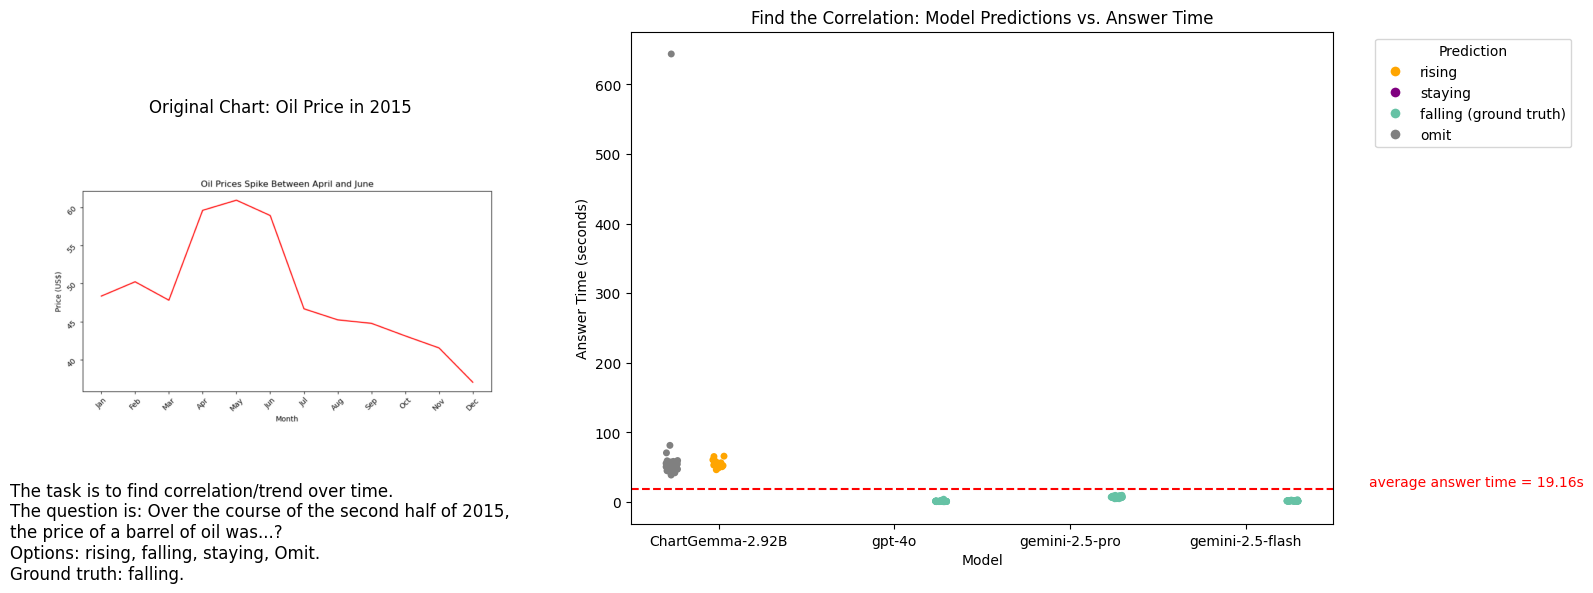

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from matplotlib.lines import Line2D
from PIL import Image
import numpy as np

# === Step 1: Load & Crop Image ===
image_path = "/Users/ramihuunguyen/Documents/PhD/Visualization_Literacy/AVANITH/Find_Correlations/Predictions/Q121_img1_Red.png"
img = Image.open(image_path).convert("RGB")
img_np = np.array(img)

white_threshold = 240
def is_row_white(row):
    return np.all(row >= white_threshold)

for i in range(img_np.shape[0] - 1, -1, -1):
    if not is_row_white(img_np[i]):
        safe_bottom = i
        break

buffer = 30
bottom_cutoff = min(img_np.shape[0], safe_bottom + buffer)
cropped_img = img.crop((0, 0, img.width, bottom_cutoff))
cropped_array = np.array(cropped_img)

# === Step 2: Load Data & Clean ===
merged_df = pd.read_csv("/Users/ramihuunguyen/Documents/PhD/Visualization_Literacy/AVANITH/Find_Correlations/Predictions/Merged_find_correlations.csv")
merged_df['Prediction'] = merged_df['Prediction'].str.strip().str.rstrip('.').str.lower()

# Standardize ground truth label
merged_df['Prediction'] = merged_df['Prediction'].replace('falling', 'falling (ground truth)')

# Compute average answer time
avg_time = merged_df['Answer Time'].mean()

# Custom color palette
palette_custom = {
    'rising': 'orange',
    'staying': 'purple',
    'falling (ground truth)': '#66c2a5',
    'omit': 'gray'
}

# === Step 3: Visualization ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1, 1.3]})

# Left: Chart Image
ax1.imshow(cropped_array)
ax1.axis('off')
ax1.set_title("Original Chart: Oil Price in 2015", fontsize=12)

caption = (
    "The task is to find correlation/trend over time.\n"
    "The question is: Over the course of the second half of 2015,\n"
    "the price of a barrel of oil was...?\n"
    "Options: rising, falling, staying, Omit.\n"
    "Ground truth: falling."
)
ax1.text(0.0, -0.15, caption, ha='left', va='top', fontsize=12, transform=ax1.transAxes, wrap=True)

# Right: Model Answer Time by Prediction
sns.stripplot(
    data=merged_df,
    x='Model Name',
    y='Answer Time',
    hue='Prediction',
    dodge=True,
    jitter=True,
    palette=palette_custom,
    ax=ax2
)

ax2.set_title("Find the Correlation: Model Predictions vs. Answer Time", fontsize=12)
ax2.set_ylabel("Answer Time (seconds)")
ax2.set_xlabel("Model")

# Average answer time line
ax2.axhline(y=avg_time, color='red', linestyle='--', linewidth=1.5)
ax2.text(
    x=len(merged_df['Model Name'].unique()) - 0.3,
    y=avg_time - 0.3,
    s=f"average answer time = {avg_time:.2f}s",
    color='red',
    fontsize=10,
    ha='left',
    va='bottom'
)

# Custom legend
custom_legend = [
    Line2D([0], [0], marker='o', color='w', label='rising', markerfacecolor='orange', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='staying', markerfacecolor='purple', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='falling (ground truth)', markerfacecolor='#66c2a5', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='omit', markerfacecolor='gray', markersize=8)
]
ax2.legend(handles=custom_legend, title='Prediction', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



## Filter ChartGemma predictions for 'omit' and 'rising'

/var/folders/yx/xwgyyhkn2q70lkg06rg9k5l00000gn/T/ipykernel_10024/3652429534.py:41: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle(


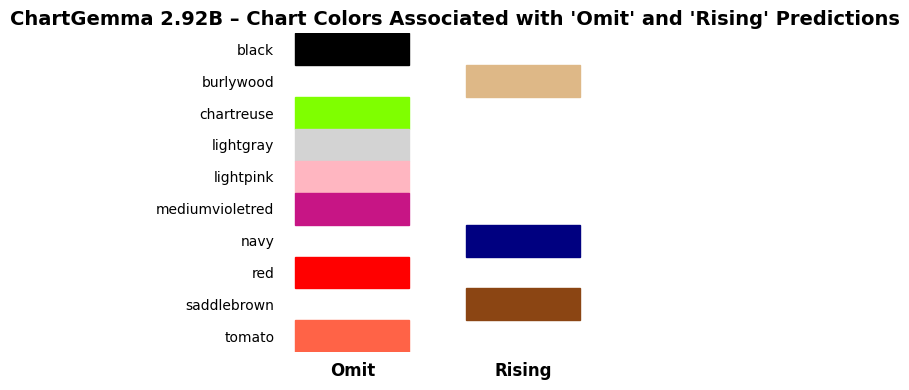

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# === Prepare data ===
df = merged_df.copy()
df['Prediction'] = df['Prediction'].str.strip().str.rstrip('.').str.lower()

# Filter only ChartGemma and wrong predictions
chartgemma_df = df[
    (df['Model Name'] == 'ChartGemma-2.92B') &
    (df['Prediction'].isin(['omit', 'rising']))
].copy()

# Create presence matrix
chartgemma_df['Value'] = 1
heatmap_df = chartgemma_df.pivot_table(
    index='Color',
    columns='Prediction',
    values='Value',
    aggfunc='count',
    fill_value=0
)

# Ensure both columns exist
for col in ['omit', 'rising']:
    if col not in heatmap_df.columns:
        heatmap_df[col] = 0

# Reorder
heatmap_df = heatmap_df[['omit', 'rising']]
heatmap_df = heatmap_df.sort_index()

# === Plot ===
fig, ax = plt.subplots(figsize=(5, len(heatmap_df) * 0.4))

# Add rectangles with spacing between columns
column_x = {'omit': 0, 'rising': 1.5}  # horizontal gap here
for i, color in enumerate(heatmap_df.index):
    for pred in ['omit', 'rising']:
        if heatmap_df.loc[color, pred] > 0:
            ax.add_patch(plt.Rectangle(
                (column_x[pred], i), 1, 1,
                color=color.lower(),
                edgecolor='black'
            ))

# Set ticks and labels
ax.set_xticks([0.5, 2.0])
ax.set_xticklabels(['Omit', 'Rising'], fontsize=12, weight='bold')
ax.set_yticks([i + 0.5 for i in range(len(heatmap_df))])
ax.set_yticklabels(heatmap_df.index, fontsize=10)
ax.set_xlim(-0.1, 2.9)
ax.set_ylim(0, len(heatmap_df))

# Title and style
ax.set_title("ChartGemma 2.92B – Chart Colors Associated with 'Omit' and 'Rising' Predictions",
             fontsize=14, weight='bold')
ax.invert_yaxis()
ax.tick_params(left=False, bottom=False)
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()


In [23]:
print(chartgemma_df.columns)


Index(['Index', 'Image', 'Question Type', 'Prompt', 'Question Description',
       'Model Name', 'Color', 'Chart Title', 'Image Path', 'Ground Truth',
       'Prediction', 'Answer Time'],
      dtype='object')
